## Introduzione

Il dataset si compone ...

### Dipendenze

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Acquisizione Dati

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('drug_consumption.data', header=None)
drugs_labels = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
                'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
data.columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS' ] + drugs_labels
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

### Organizzazione e pulizia

In [9]:
#check duplicate records
data.drop_duplicates().count()

ID           1885
Age          1885
Gender       1885
Education    1885
Country      1885
Ethnicity    1885
Nscore       1885
Escore       1885
Oscore       1885
Ascore       1885
Cscore       1885
Impulsive    1885
SS           1885
Alcohol      1885
Amphet       1885
Amyl         1885
Benzos       1885
Caff         1885
Cannabis     1885
Choc         1885
Coke         1885
Crack        1885
Ecstasy      1885
Heroine      1885
Ketamine     1885
Legalh       1885
LSD          1885
Meth         1885
Mushrooms    1885
Nicotine     1885
Semer        1885
VSA          1885
dtype: int64

In [10]:
#check NA
data.isna().sum().sum()

0

In [19]:
#convert classes into integer
data[drugs_labels] = data[drugs_labels].apply(lambda c: c.map(lambda x: int(x.lstrip('CL'))), axis=1)

AttributeError: 'int' object has no attribute 'lstrip'

### Esplorazione statistica

In [20]:
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292,4.635013,1.340584,0.606897,1.465252,5.483820,2.989390,5.106631,1.161273,0.297613,1.314058,0.374005,0.569231,1.355968,1.061538,0.826525,1.187268,3.200531,0.009549,0.433422
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701,1.331253,1.783587,1.064210,1.867275,1.114648,2.287438,1.089315,1.513031,0.837053,1.647567,1.034779,1.220015,1.789647,1.491103,1.646632,1.466341,2.413932,0.159331,0.962375
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,2.000000,1.000000,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000,0.000000
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,1.000000,-0.271395,-0.025467,-0.025253,-0.340751,0.059309,0.018639,-0.046960,0.173565,-0.028782,-0.072094,0.119663,0.165882,-0.020281,0.168624,-0.029705,0.156942,-0.006448,0.209274,-0.060475,0.091650,0.082169,0.167231,0.091180,0.074800,0.220806,0.215234,0.175429,0.202910,0.063197,0.050454,0.101165
Age,-0.271395,1.000000,0.110286,0.158811,0.354241,-0.069753,-0.136654,-0.033849,-0.226778,0.063504,0.183564,-0.190939,-0.332188,-0.028773,-0.246748,-0.098108,-0.126416,0.037413,-0.446846,0.047522,-0.220664,-0.051355,-0.384784,-0.121675,-0.220689,-0.419839,-0.323207,-0.191503,-0.331456,-0.248883,-0.049729,-0.229657
Gender,-0.025467,0.110286,1.000000,0.196774,0.216271,-0.001213,0.074646,0.057864,-0.131021,0.219743,0.183831,-0.167492,-0.244277,-0.002537,-0.222440,-0.162250,-0.133717,-0.011195,-0.301579,0.074584,-0.176704,-0.151324,-0.228574,-0.136728,-0.189825,-0.315676,-0.278983,-0.181489,-0.272431,-0.192084,0.013354,-0.134852
Education,-0.025253,0.158811,0.196774,1.000000,0.225311,-0.036099,-0.100993,0.115645,0.057994,0.091088,0.240417,-0.132482,-0.131146,0.130657,-0.153895,-0.002560,-0.133038,0.036019,-0.265405,0.027837,-0.108433,-0.147743,-0.159819,-0.131051,-0.076479,-0.208656,-0.177817,-0.170103,-0.169762,-0.240547,-0.036342,-0.120540
Country,-0.340751,0.354241,0.216271,0.225311,1.000000,-0.127946,-0.136191,0.109524,-0.341969,0.150921,0.214000,-0.231572,-0.345415,0.076361,-0.395836,0.080596,-0.401114,0.004974,-0.551938,0.124505,-0.277531,-0.229899,-0.336328,-0.300210,-0.112577,-0.426030,-0.498263,-0.413946,-0.490052,-0.277913,-0.068018,-0.267033
Ethnicity,0.059309,-0.069753,-0.001213,-0.036099,-0.127946,1.000000,0.047642,0.018402,0.084816,-0.038726,-0.029923,0.082411,0.100304,0.053825,0.084407,0.038790,0.118517,0.084292,0.136049,0.024475,0.086853,0.035478,0.071826,0.042881,0.031961,0.077511,0.129031,0.063805,0.115962,0.077724,0.022716,0.087011
Nscore,0.018639,-0.136654,0.074646,-0.100993,-0.136191,0.047642,1.000000,-0.431051,0.010177,-0.216964,-0.391088,0.174399,0.079988,-0.001882,0.131120,0.033317,0.272221,0.013032,0.095535,0.012583,0.139915,0.111435,0.069948,0.172685,0.062750,0.113342,0.037095,0.184672,0.042386,0.128430,-0.001673,0.115086
Escore,-0.046960,-0.033849,0.057864,0.115645,0.109524,0.018402,-0.431051,1.000000,0.245277,0.157336,0.308024,0.114151,0.210130,0.092303,-0.041095,0.030199,-0.103442,0.054343,-0.014369,0.020305,0.030942,-0.050969,0.078822,-0.079998,0.018727,-0.037383,0.018166,-0.121708,0.021105,-0.019196,0.022909,-0.032910
Oscore,0.173565,-0.226778,-0.131021,0.057994,-0.341969,0.084816,0.010177,0.245277,1.000000,0.038516,-0.056811,0.277512,0.421709,0.032711,0.221116,0.060511,0.201334,0.027304,0.414163,0.001239,0.188276,0.097002,0.296306,0.134194,0.185061,0.317322,0.369759,0.171984,0.369139,0.195460,0.026774,0.150502
Ascore,-0.028782,0.063504,0.219743,0.091088,0.150921,-0.038726,-0.216964,0.157336,0.038516,1.000000,0.247482,-0.229690,-0.208061,-0.021806,-0.148868,-0.096057,-0.164512,-0.016190,-0.148481,0.036266,-0.198147,-0.103945,-0.114550,-0.169886,-0.110763,-0.139983,-0.093888,-0.156847,-0.111424,-0.111075,0.019750,-0.114083


### Esplorazione visuale

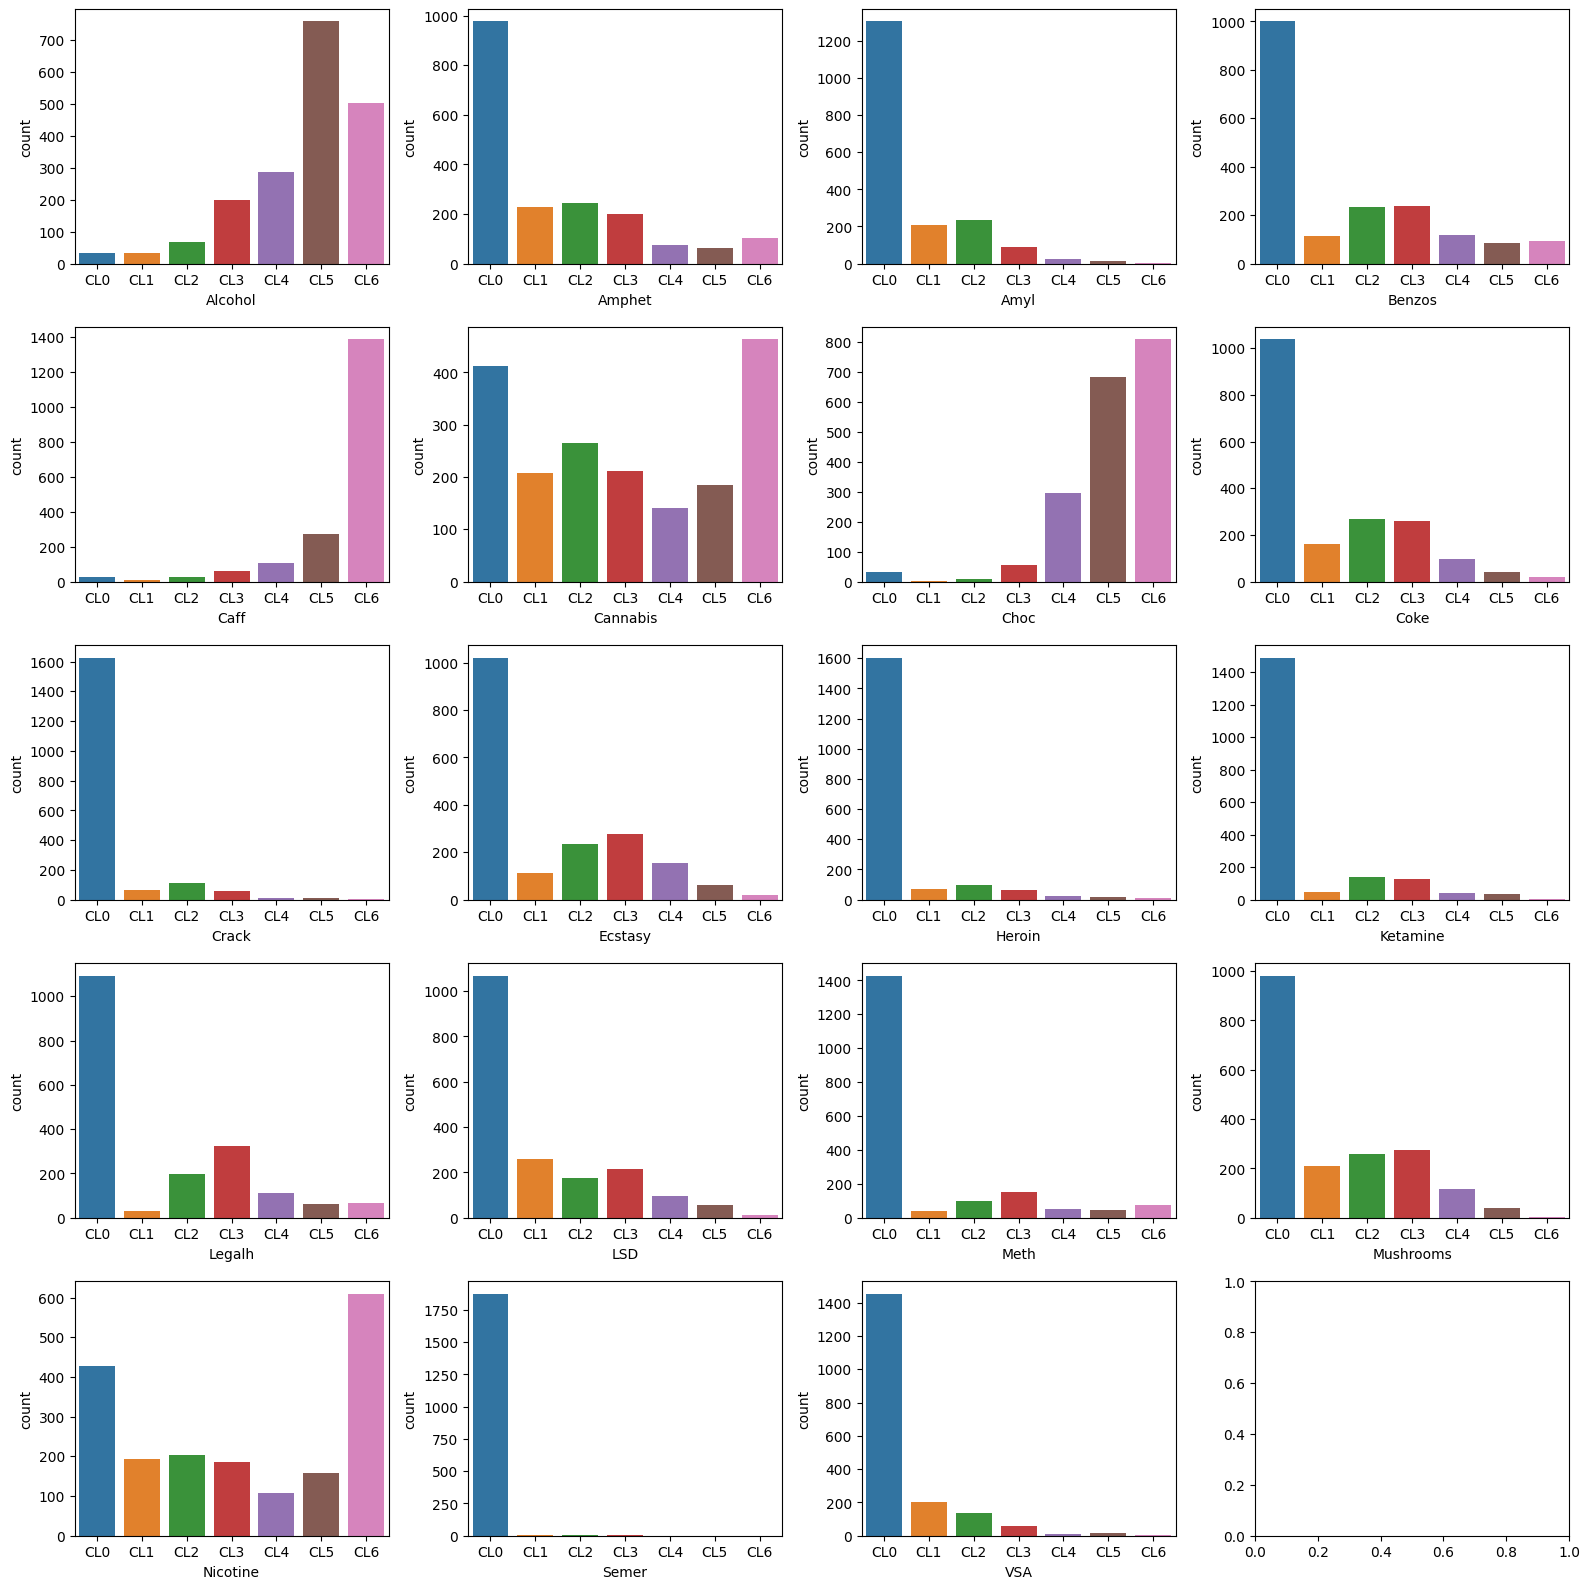

In [51]:
fig, axes = plt.subplots(5,4,figsize = (16,16))

df = data.drop((x for x in data.columns if x not in drugs_labels), axis=1)

l = 0
for i in range(5):
    for j in range(4):
        if i == 4 and j == 3:
            continue
        sns.countplot(x=drugs_labels[l], data=df, ax=axes[i][j], order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
        l = l+1

plt.tight_layout()
plt.show()

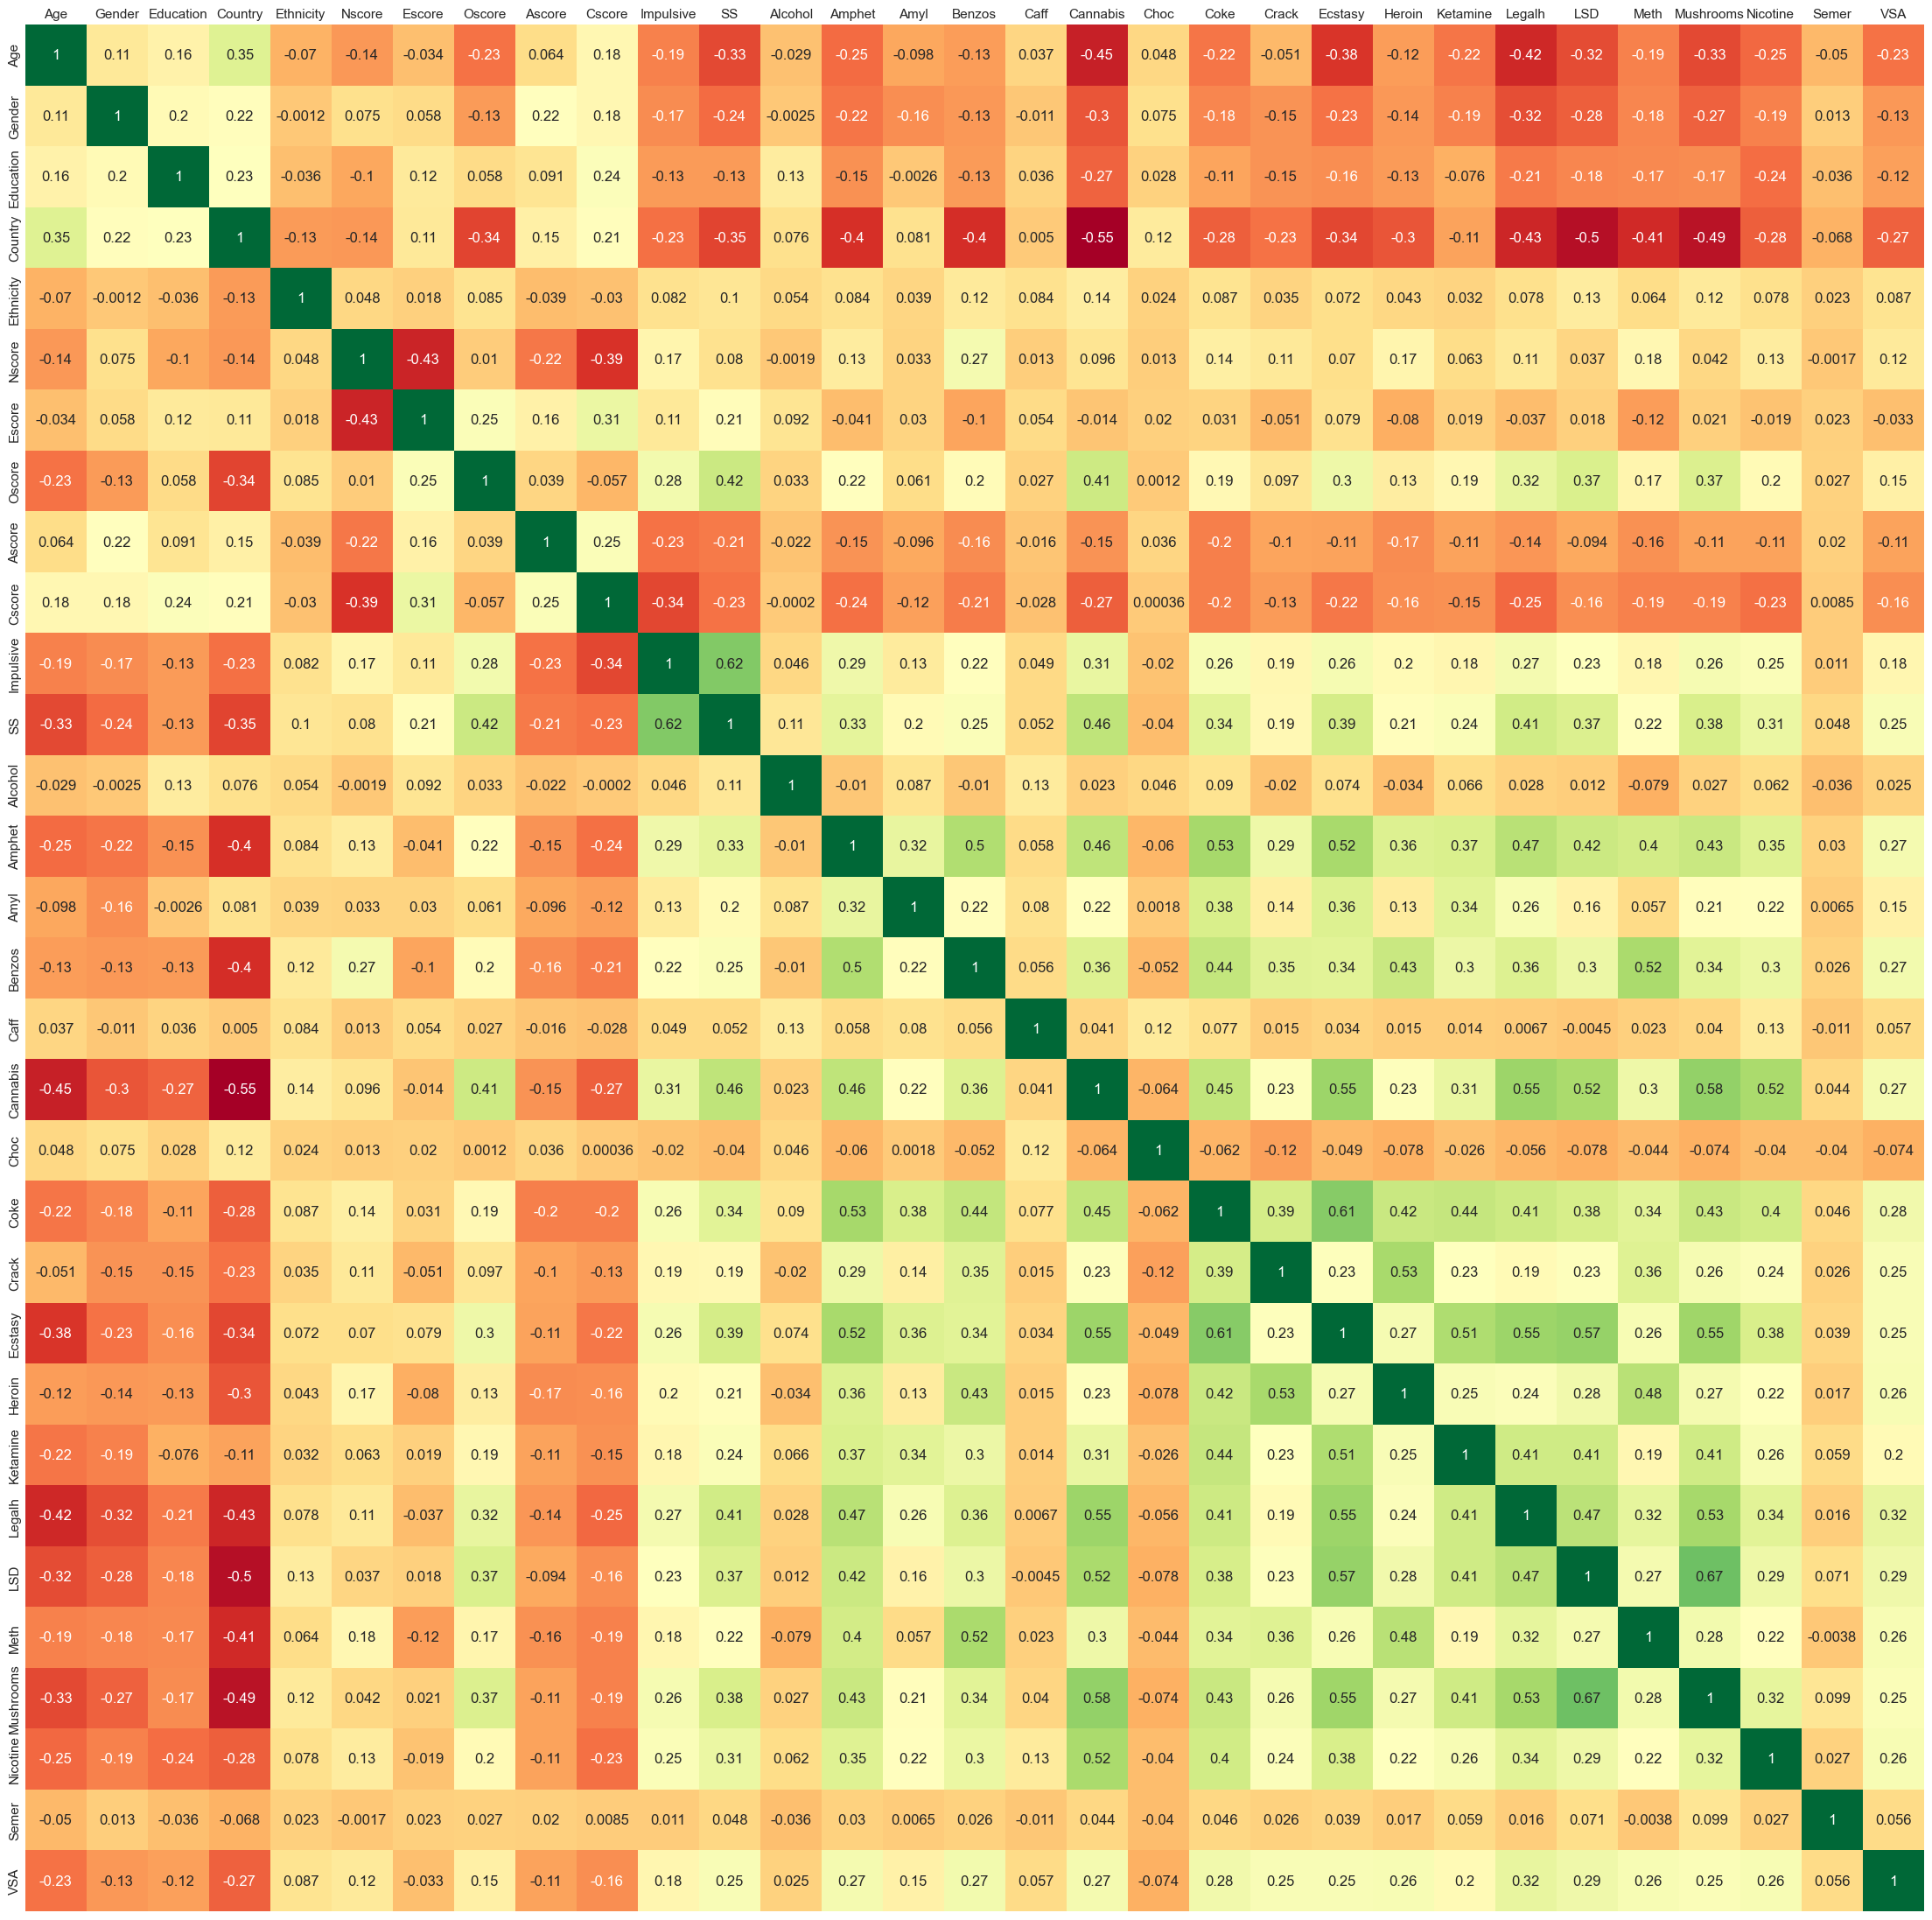

In [46]:
f, ax = plt.subplots(figsize=(28, 28))

sns.heatmap(data.drop('ID', axis=1).corr(), cmap = 'RdYlGn', annot=True, cbar=False)
ax.tick_params(length=0)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

### Formulazione domande di analisi

### Regressione

### Classificazione

### Clustering

### Conclusioni